In [1]:
import numpy as np

## 【問題1】2x2マスのチェス盤の小麦の数
2×2マスのチェス盤をndarrayによって表現し、各マスの小麦の数を計算してください。  左上のマスに小麦を1つ置いた後、その右が2つ、左下が4つ、右下が8つという風に進みます。  
サンプルコードで作成したndarrayのshapeの変形を行ってください。

In [2]:
# サンプルコード
n_squares = 4
small_board_list = [1]
for _ in range(n_squares-1):
    small_board_list.append(2*small_board_list[-1])
print('4マスの板に小麦を並べる（リスト）: {}'.format(small_board_list))

4マスの板に小麦を並べる（リスト）: [1, 2, 4, 8]


In [3]:
# リスト型からnumpy.ndarrayに変換
small_board_ndarray = np.array(small_board_list)
print('4マスの板に小麦を並べる（ndarray）: {}'.format(small_board_ndarray))

4マスの板に小麦を並べる（ndarray）: [1 2 4 8]


In [4]:
# numpy.ndarray
n_squares = 4

board_22 = np.zeros(n_squares)
for i in range(n_squares):
    board_22[i] = 2 ** i
board_22 = board_22.reshape(2, 2)
board_22

array([[1., 2.],
       [4., 8.]])

## 【問題2】nxmマスへの拡張
n×mマスのチェス盤の小麦の数を記したndarrayを返す関数を作成してください。  
そして、この関数を使い8×8マスのチェス盤の小麦の数を求めてください。

In [5]:
def chess_wheat(n_squares=4):
    """
    n_squares: int 全マス数
    """
    board = np.zeros(n_squares)
    for i in range(n_squares):
        board[i] = 2 ** i
    board = board.reshape(int(np.sqrt(n_squares)), -1)
    return board.astype(np.uint64)

In [6]:
chess_wheat(64)

array([[                  1,                   2,                   4,
                          8,                  16,                  32,
                         64,                 128],
       [                256,                 512,                1024,
                       2048,                4096,                8192,
                      16384,               32768],
       [              65536,              131072,              262144,
                     524288,             1048576,             2097152,
                    4194304,             8388608],
       [           16777216,            33554432,            67108864,
                  134217728,           268435456,           536870912,
                 1073741824,          2147483648],
       [         4294967296,          8589934592,         17179869184,
                34359738368,         68719476736,        137438953472,
               274877906944,        549755813888],
       [      1099511627776,       

## 【問題3】小麦の数の合計
8×8マスのチェス盤の小麦の数の合計を求めてください。  
また、各列の平均を求め、それを棒グラフで可視化してください。  
棒グラフはサンプルコードを用意しています。

In [7]:
print('8×8マスのチェス盤の小麦の数: {}'.format(chess_wheat(64).sum()))

8×8マスのチェス盤の小麦の数: 18446744073709551615


In [8]:
col = chess_wheat(64).sum(axis=0)

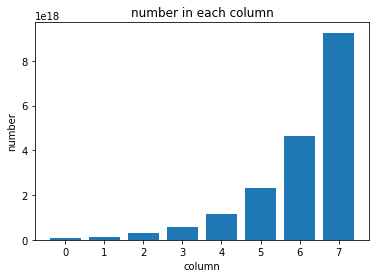

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.xlabel("column")
plt.ylabel("number")
plt.title("number in each column")
plt.bar(np.arange(8), col)
plt.show()

## 【問題4】小麦の数のヒートマップ
8×8マスのチェス盤の小麦の数をヒートマップとして可視化してください。  
ヒートマップはサンプルコードを用意しています。  
《ヒートマップのサンプルコード》  
4行2列の配列のヒートマップです。  
値が小さいところが紫、大きいところが黄色になっています。

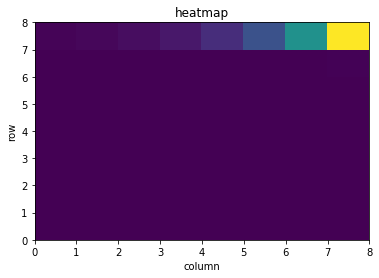

In [10]:
plt.xlabel("column")
plt.ylabel("row")
plt.title("heatmap")
plt.pcolor(chess_wheat(64).reshape(8, 8))
plt.show();

## 【問題5】後半は前半の何倍か
チェス盤の後半にある小麦の数は前半にある小麦の数の何倍かを求めてください。  
前半とは配列の0から3行目、後半は4から7行目です。

In [15]:
former = chess_wheat(64).reshape(-1)[:32].sum()
latter = chess_wheat(64).reshape(-1)[32:].sum()
ratio = latter / former

In [16]:
ratio

4294967296.0

## 【問題6】他の計算方法によるnxmマスへの拡張
問題2と同様の「n×mマスのチェス盤の小麦の数を記したndarrayを返す関数」を、np.append()を使ったものと、ブロードキャストを使ったもので新たに作成してください。  
それらの関数を使い8×8マスのチェス盤の小麦の数を再び求めてください。

In [18]:
def chess_wheat_append(n_squares):
    board_ndarray = np.array([1])
    for _ in range(n_squares-1):
        board_ndarray = np.append(board_ndarray, 2*board_ndarray[-1])
    return board_ndarray.astype(np.uint)

In [17]:
def chess_wheat_bc(n_squares):
    indices_of_squares = np.arange(n_squares)
    board_ndarray = 2 ** indices_of_squares
    return board_ndarray.astype(np.uint)

In [19]:
print('最後のマスの小麦の数: {}'.format(chess_wheat_append(64)[-1]))

最後のマスの小麦の数: 9223372036854775808


/Users/nambayasumasa/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in long_scalars
  after removing the cwd from sys.path.


In [20]:
print('最後のマスの小麦の数: {}'.format(chess_wheat_bc(64)[-1]))

最後のマスの小麦の数: 9223372036854775808


## 【問題7】計算時間の比較
3種類の方法を見てきました。それぞれの計算時間をJupyter Notebookの%%timeitを用いて計測し、比較と考察を行ってください。  
%%timeitはセル内のコードを複数回実行し、その平均実行時間を出力する働きをします。

In [21]:
%%timeit
chess_wheat(64)

34.7 µs ± 992 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [22]:
%%timeit
chess_wheat_append(64)

/Users/nambayasumasa/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in long_scalars
  after removing the cwd from sys.path.


466 µs ± 6.97 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [23]:
%%timeit
chess_wheat_bc(64)

3.25 µs ± 63.9 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
